# Modeling and Simulation in Python

Chapter 5: Design

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


We'll start with the same code we saw last time: the magic command that tells Jupyter where to put the figures, and the import statement that gets the function defined in the `modsim` module.

In [1]:
# If you want the figures to appear in the notebook, 
# and you want to interact with them, use
# %matplotlib notebook

# If you want the figures to appear in the notebook, 
# and you don't want to interact with them, use
# %matplotlib inline

# If you want the figures to appear in separate windows, use
# %matplotlib qt

# To switch from one to another, you have to select Kernel->Restart

%matplotlib inline

from modsim import *

In [401]:
def make_system(beta, gamma):

    init = np.array([300, 1, 0.0])
    init /= np.sum(init)

    t0 = 0
    t_end = 7 * 14

    system = State(init=init, t0=t0, t_end=t_end,
                   beta=beta, gamma=gamma)
    return system


In [402]:
tc = 3      # time between contacts in days 
tr = 4      # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

sir = make_system(beta, gamma)

In [481]:
def update1(system, state):
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return s, i, r

In [482]:
update1(sir, sir.init)

(0.99369764130638738, 0.0054717939095594971, 0.00083056478405315617)

In [483]:
def run_model(system, update_func):
    state = system.init
    for i in range(system.t0, system.t_end):
        state = update_func(system, state)
    return state

In [484]:
run_model(sir, update1)

(0.017035314100399539, 8.6202797095725104e-11, 0.98296468581339747)

In [485]:
def run_model(system, update_func):
    S = Series([])
    I = Series([])
    R = Series([])

    state = system.init
    S[0], I[0], R[0] = state
    
    for i in range(sir.t0, sir.t_end):
        state = update_func(system, state)
        S[i+1], I[i+1], R[i+1] = state
    
    system.results = S, I, R

In [486]:
sir = make_system(beta, gamma)
run_model(sir, update1)
S, I, R = sir.results

In [487]:
def plot_results(S, I, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Resistent')
    decorate(xlabel='Time (days)', ylabel='Fraction of population')

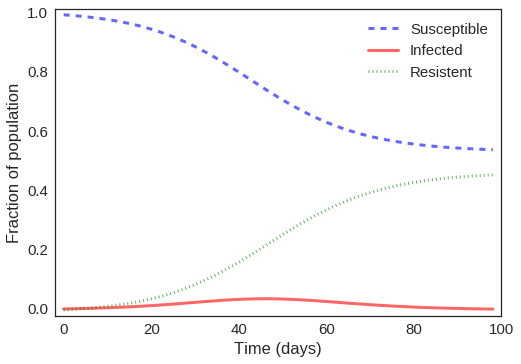

In [488]:
plot_results(S, I, R)

In [489]:
def run_model(system, update_func):
    df = DataFrame(columns=['S', 'I', 'R'])
    df.loc[0] = system.init
    
    for i in range(system.t0, system.t_end):
        df.loc[i+1] = update_func(system, df.loc[i])
    
    system.results =  df

In [490]:
sir = make_system(beta, gamma)
run_model(sir, update1)
sir.results.head()

,S,I,R
0,0.996678,0.003322,0.000000
1,0.995574,0.003595,0.000831
2,0.994381,0.003890,0.001729
3,0.993092,0.004207,0.002702
4,0.991699,0.004547,0.003754


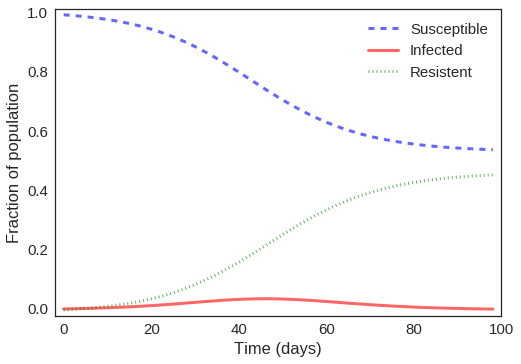

In [491]:
df = sir.results
plot_results(df.S, df.I, df.R)

In [492]:
def total_infected(system):
    df = system.results
    return (df.R[t_end] - df.R[t0]) + (df.I[t_end] - df.I[t0])

In [493]:
sir.beta, total_infected(sir)

(0.3333333333333333, 0.45566215811278105)

In [494]:
sir.beta = 0.4
run_model(sir, update1)
sir.beta, total_infected(sir)

(0.4, 0.65114205420942228)

In [495]:
beta_array = linspace(0.1, 0.9, 11)

In [496]:
sir = make_system(0, gamma)
for sir.beta in beta_array:
    run_model(sir, update1)
    print(sir.beta, total_infected(sir))

0.1 0.00219889166292
0.18 0.00831781253465
0.26 0.086506544492
0.34 0.481223023372
0.42 0.692042810145
0.5 0.809427533195
0.58 0.879759524961
0.66 0.923351162606
0.74 0.950900393344
0.82 0.968459706884
0.9 0.979642426763


In [497]:
def sweep_beta(beta_array, gamma):
    system = make_system(0, gamma)
    for system.beta in beta_array:
        run_model(system, update1)
        print(system.beta, total_infected(system))

In [498]:
sweep_beta(beta_array, gamma)

0.1 0.00219889166292
0.18 0.00831781253465
0.26 0.086506544492
0.34 0.481223023372
0.42 0.692042810145
0.5 0.809427533195
0.58 0.879759524961
0.66 0.923351162606
0.74 0.950900393344
0.82 0.968459706884
0.9 0.979642426763


In [499]:
def sweep_beta(beta_array, gamma):
    system = make_system(0, gamma)
    series = Series()
    for system.beta in beta_array:
        run_model(system, update1)
        print(system.beta, total_infected(system))
        series[system.beta] = total_infected(system)
    return series

In [500]:
infected = sweep_beta(beta_array, gamma)

0.1 0.00219889166292
0.18 0.00831781253465
0.26 0.086506544492
0.34 0.481223023372
0.42 0.692042810145
0.5 0.809427533195
0.58 0.879759524961
0.66 0.923351162606
0.74 0.950900393344
0.82 0.968459706884
0.9 0.979642426763


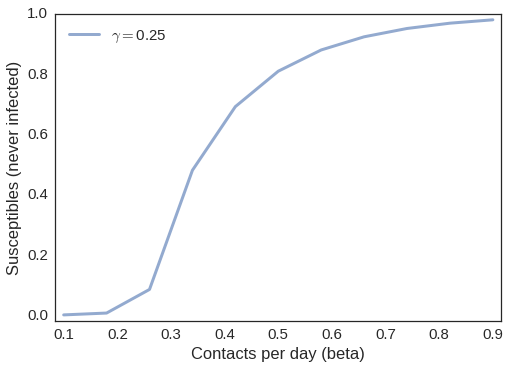

In [501]:
label = '$\gamma = $' + str(gamma)
plot(infected, label=label)
decorate(xlabel='Contacts per day (beta)',
         ylabel='Susceptibles (never infected)')

In [502]:
gamma_array = linspace(0.1, 0.9, 5)
gamma_array

array([ 0.1,  0.3,  0.5,  0.7,  0.9])

In [503]:
# TODO: make a beta_sweep for each value of gamma

In [248]:
beta_array = linspace(0, 0.8, 11)
s_inf_sim = Series()

for sir.beta in beta_array:
    df = run_model(sir, update1)
    R0 = sir.beta / sir.gamma
    s_inf_sim[R0] = df.S[t_end]

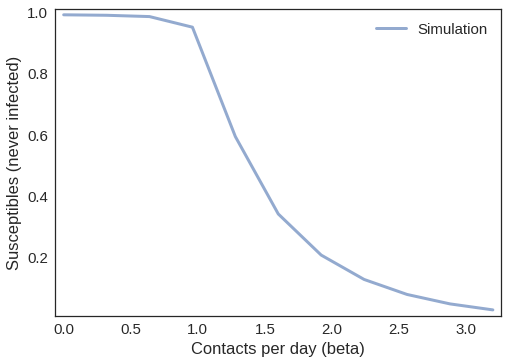

In [249]:
newfig()
plot(s_inf_sim, '-', label='Simulation')
    
decorate(xlabel='Contacts per day (beta)',
         ylabel='Susceptibles (never infected)')

In [262]:
s_inf_array = linspace(0.1, 0.99, 21)
s_inf_array

array([ 0.1   ,  0.1445,  0.189 ,  0.2335,  0.278 ,  0.3225,  0.367 ,
        0.4115,  0.456 ,  0.5005,  0.545 ,  0.5895,  0.634 ,  0.6785,
        0.723 ,  0.7675,  0.812 ,  0.8565,  0.901 ,  0.9455,  0.99  ])

In [263]:
R0_array = np.log(s_inf_array) / (s_inf_array - 1)
R0_array

array([ 2.55842788,  2.26122241,  2.0542642 ,  1.89768193,  1.77303901,
        1.67033527,  1.58355992,  1.50882967,  1.44349719,  1.38568104,
        1.33399887,  1.28740696,  1.24509925,  1.20644106,  1.17092439,
        1.13813677,  1.10773904,  1.07944921,  1.05303052,  1.0282824 ,
        1.00503359])

In [264]:
s_inf_analysis = Series(s_inf_array, index=R0_array)

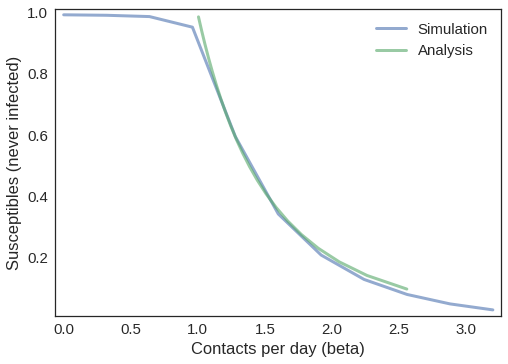

In [267]:
newfig()
plot(s_inf_sim, label='Simulation')
plot(s_inf_analysis, label='Analysis')

decorate(xlabel='Contacts per day (beta)',
         ylabel='Susceptibles (never infected)')

In [116]:
from sympy import symbols, solve, log, Eq

In [117]:
S_infty, c = symbols(['S_infty', 'c'])

In [119]:
eq = Eq(S_infty - log(S_infty) / c, 1)
eq

Eq(S_infty - log(S_infty)/c, 1)

In [121]:
solve(eq, S_infty)

[-LambertW(-c*exp(-c))/c]

In [122]:
from scipy.special import lambertw

In [131]:
c = sir.beta / sir.gamma
c

4.0

In [133]:
lambertw(4)

(nan+0j)

In [132]:
-lambertw(-c*np.exp(-c)) / c

(nan+nan*j)

In [85]:
from sympy import symbols, Eq, diff, Function

In [86]:
S, I, R = symbols(['S', 'I', 'R'], cls=Function)

In [87]:
N, beta, gamma, t = symbols(['N', 'beta', 'gamma', 't'])

In [90]:
diff(S(t), t)

Derivative(S(t), t)

In [93]:
eq1 = Eq(diff(S(t), t), -beta*I(t)*S(t)/N)
eq1

Eq(Derivative(S(t), t), -beta*I(t)*S(t)/N)

In [95]:
eq2 = Eq(diff(R(t), t), gamma*I(t))
eq2

Eq(Derivative(R(t), t), gamma*I(t))

In [97]:
(eq1 / eq2).simplify()

(Eq(Derivative(S(t), t), -beta*I(t)*S(t)/N))*(Eq(Derivative(R(t), t), gamma*I(t)))**(-1)